캐나다 토론토 대학교에서 제작한 데이터셋
제프리 힌턴에 데이터셋 제작에 참여
구성 : 32 x 32 x 3의 컬러이미지 데이터 - 총 60000개의 이미지
50000개의 트레이닝용 이미지
10000개의 검증용 이미지
10개의 데이터 종류별로 6000개의 이미지


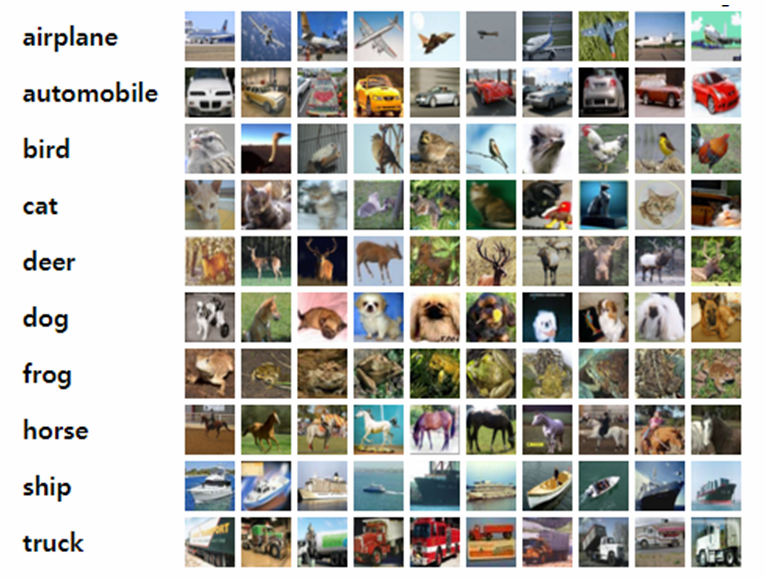

In [8]:
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from sklearn.metrics import classification_report

In [2]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float")/255
testX = testX.astype("float")/255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
lb = LabelBinarizer()

trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [4]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [5]:
opt = SGD(learning_rate=0.01)

height = 32
width = 32
depth =3

model = Sequential()
inputShape = (height, width, depth)

if K.image_data_format() == "channels_first":
	inputShape = (depth, height, width)



In [13]:
# 모델의 구성
from tensorflow.keras import Input, layers, models

# CNN Layers
inputs = Input(shape=inputShape)
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

# Flatten and Dense Layers
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 생성
model = models.Model(inputs=inputs, outputs=outputs)


In [14]:
# 모델 설정
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"] )

In [15]:
# 모델 훈련
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs =40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1946 - loss: 2.1728 - val_accuracy: 0.2559 - val_loss: 2.1007
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3720 - loss: 1.7471 - val_accuracy: 0.4009 - val_loss: 1.6275
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4547 - loss: 1.5098 - val_accuracy: 0.4854 - val_loss: 1.4120
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5040 - loss: 1.3857 - val_accuracy: 0.5096 - val_loss: 1.4067
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5396 - loss: 1.2935 - val_accuracy: 0.5641 - val_loss: 1.2375
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5691 - loss: 1.2186 - val_accuracy: 0.5611 - val_loss: 1.2407
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5905 - loss: 1.1577 - val_accuracy: 0.5626 - val_loss: 1.2263
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6124 - loss: 1.1078 -

In [16]:
# 모델 예측
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.70      0.76      0.73      1000
  automobile       0.76      0.84      0.80      1000
        bird       0.63      0.55      0.59      1000
         cat       0.47      0.56      0.51      1000
        deer       0.62      0.70      0.66      1000
         dog       0.60      0.56      0.58      1000
        frog       0.78      0.73      0.75      1000
       horse       0.76      0.71      0.73      1000
        ship       0.85      0.77      0.81      1000
       truck       0.80      0.73      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



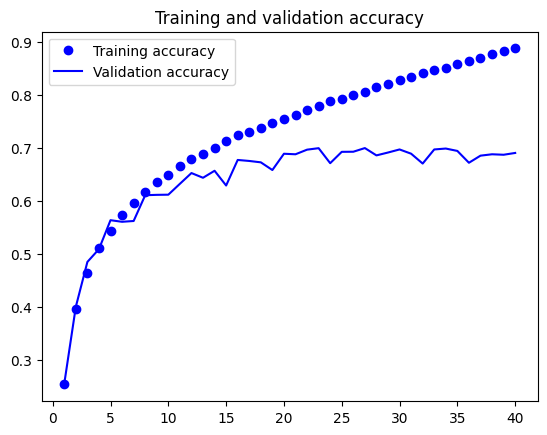

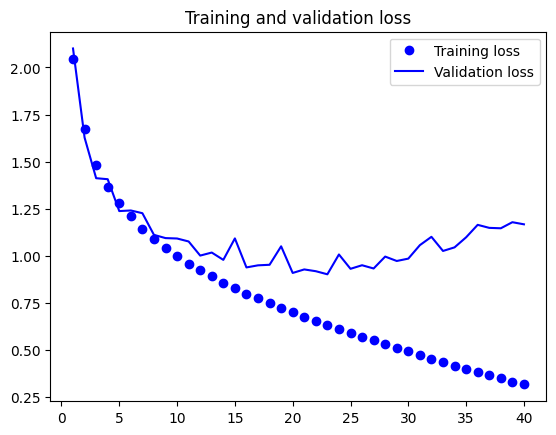

In [17]:
import matplotlib.pyplot as plt
acc = H.history["accuracy"]
val_acc = H.history["val_accuracy"]
loss = H.history["loss"]
val_loss = H.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [18]:
# 추론파일 저장
model.save('cifar10_cnn.h5')

# 추론

In [19]:
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
from google.colab.patches import cv2_imshow

In [20]:
model_i = load_model('./cifar10_cnn.h5')

In [21]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

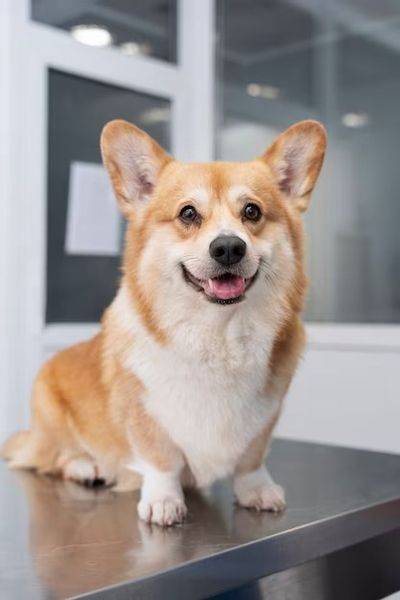

In [31]:
# 내가 판단할 이미지를 로드 OpenCV로 한다.
img = cv2.imread('./dog.jpg')
cv2_imshow(img)
cv2.waitKey(2000)
cv2.destroyAllWindows()


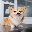

In [32]:
img_resized = cv2.resize(img, (32,32))
cv2_imshow(img_resized)
cv2.waitKey(2000)
cv2.destroyAllWindows()

In [33]:
img_norm = img_resized.astype('float')/255.0


In [34]:
X = np.asarray([img_norm])

predictions = model(X, training=False)

print(predictions)
print(np.argmax(predictions))

tf.Tensor(
[[2.1291768e-05 8.6245064e-09 2.4139619e-09 5.0953959e-06 1.2969547e-03
  5.5478555e-01 3.3636610e-16 4.4389108e-01 2.0854264e-10 2.8599769e-09]], shape=(1, 10), dtype=float32)
5


In [27]:
from tensorflow import keras
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [29]:
# 모델의 구성
from tensorflow.keras import Input, layers, models

# CNN Layers
inputs = Input(shape=inputShape)
x = data_augmentation(inputs)
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

# Flatten and Dense Layers
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 모델 생성
model = models.Model(inputs=inputs, outputs=outputs)
# 모델 설정
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"] )
# 모델 훈련
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs =40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3417 - loss: 1.7624 - val_accuracy: 0.5282 - val_loss: 1.3372
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5682 - loss: 1.2126 - val_accuracy: 0.6123 - val_loss: 1.0963
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6330 - loss: 1.0395 - val_accuracy: 0.6538 - val_loss: 0.9813
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6713 - loss: 0.9324 - val_accuracy: 0.6744 - val_loss: 0.9200
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7056 - loss: 0.8485 - val_accuracy: 0.6886 - val_loss: 0.8833
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7285 - loss: 0.7702 - val_accuracy: 0.6905 - val_loss: 0.8879
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7469 - loss: 0.7219 - val_accuracy: 0.7069 - val_loss: 0.8508
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7675 - loss: 0.6621 -

In [30]:
# 모델 예측
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

    airplane       0.72      0.71      0.72      1000
  automobile       0.81      0.83      0.82      1000
        bird       0.66      0.51      0.58      1000
         cat       0.50      0.52      0.51      1000
        deer       0.59      0.68      0.63      1000
         dog       0.58      0.60      0.59      1000
        frog       0.77      0.74      0.76      1000
       horse       0.74      0.74      0.74      1000
        ship       0.81      0.78      0.79      1000
       truck       0.76      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

